# Train Body Part Regression Model 
we will exemplary show how to train a Body Part Regression Model. In general it is important to create a very diverse dataset for training with lots of CT volumes (preferable over 1000 volumes) and from several different studies. For demonstration purposes, we will use in this notebook fewer data and only from one study. 

## 1. Download data 
First, the data needs to be downloaded. We will use the [CT Lymph Nodes Dataset](https://wiki.cancerimagingarchive.net/display/Public/CT+Lymph+Nodes) from the TCIA. <br> 
Select the dataset from the [search portal](https://nbia.cancerimagingarchive.net/nbia-search/) and download the data. This will take some minutes. 

![title](data/tcia-download-data.png)

For evaluation purposes, a corresponding landmark file is needed. 
First, we need to define landmarks, on which we want to evaluate the BPR model. Bone landmarks are more robust than organ landmarks and therefore more suitable. In this example, we will use the landmarks: pelvis-start, femur-end, L5, L3, L1, Th11, Th8, Th5, and Th2. In general, the centroid of the spines work well as evaluation landmarks. The spine landmarks can get automatically annotated with a vertebra [nnU-Net](https://github.com/MIC-DKFZ/nnUNet). 
For this example a subset of the data has been annotated already and can be found in the excel file: <br>
*data/ct-lymph-nodes-annoted-landmarks.xlsx*  <br> 
For the sake of simplicity, we have in this example only a test and training (and no validation set). 


## 2. Preprocess data 
After the data has downloaded the data needs to be preprocessed: 
1. convert dicom volumes to nifti-files
2. convert nifti-files to npy arrays 
    - downscale to pixel spacing of 64 px x 64 px 
    - pixel-spacing = 7 mm/pixel
    - rescale to -1 and 1 
    - crop Hounsfield scale at -1000 and +1500 
    - apply gaussian smoothing before downsampling to reduce aliasing effects
    
    

In [1]:
%load_ext autoreload
%autoreload 2


import os, sys, pickle
import numpy as np 
from tqdm import tqdm 
import matplotlib.pyplot as plt 

sys.path.append("../../")
from scripts.preprocessing.nifti2npy import Nifti2Npy
from utils import convert_ct_lymph_nodes_to_nifti, nifti2npy, update_meta_data, create_standard_config
from scripts.training.create_configs import get_basic_config


In [2]:

# change this path to the path where you want to store the related data to this project
base_path = "/home/AD/s429r/Documents/Data/Example/"

dicom_path = base_path + "CT Lymph Nodes/"          # raw DICOM volumes
nifti_path = base_path + "CT Lymph Nodes nifti/"    # path with nifti volumes
npy_path = base_path + "CT Lymph Nodes npy/"        # path with npy arrays for training
config_path = base_path + "configs/"                 # path where config files for training will be saved
model_path = base_path + "models/"                 # path where trained models will be saved

for path in [dicom_path, nifti_path, npy_path, config_path, model_path]: 
    if not os.path.exists(path): os.mkdir(path)

In [ ]:
# Convert Dicom to nifti
convert_ct_lymph_nodes_to_nifti(dicom_path, nifti_path)

In [ ]:
# Convert nifti files to npy and save meta_data.xlsx file 
nifti2npy(nifti_path, npy_path)

In [ ]:
# update meta data with train/val/test data from landmark file 
update_meta_data(landmark_filepath="data/ct-lymph-nodes-annotated-landmarks.xlsx", 
                 meta_data_filepath=base_path + "meta_data.xlsx")

## 3. Create config file for training
For training the BPR model the hyper parameters need to get set with the help of a config file 

In [3]:
config = create_standard_config(base_path, npy_path, config_path, model_path)

## 4. Train model
- TODO: set size to create standard config! 
- TODO: plot data in dataset
- TODO: save npy dir and only download this data 
- TODO: mse -> lmse 
- TODO: plot slices for each score 
- TODO: warnings lösen
- To calculate the landmark mean square error: 
    - to get the normalization constant d, the landmark pelvis-start and C1 are used 

In [4]:
from scripts.training.train import train_config
train_config(config)

Global seed set to 0


CONFIGURATION
*******************************************************

                              	
*******************************************************
df_data_source_path           	/home/AD/s429r/Documents/Data/Example/meta_data.xlsx
data_path                     	/home/AD/s429r/Documents/Data/Example/CT Lymph Nodes npy/
landmark_path                 	data/ct-lymph-nodes-annotated-landmarks.xlsx
model_name                    	standard_model
save_dir                      	/home/AD/s429r/Documents/Data/Example/models/
shuffle_train_dataloader      	True
random_seed                   	0
deterministic                 	True
save_model                    	True
base_model                    	vgg
                              	
*******************************************************
batch_size                    	64
effective_batch_size          	64
equidistance_range            	[5, 100]
num_slices                    	4
                              	
********************************

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Running in fast_dev_run mode: will run a full train, val and test loop using 1 batch(es).
Using native 16bit precision.

  | Name   | Type         | Params
----------------------------------------
0 | l1loss | SmoothL1Loss | 0     
1 | conv6  | Conv2d       | 262 K 
2 | fc7    | Linear       | 513   
3 | model  | Sequential   | 14.7 M
----------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params


Epoch 0:   0%|          | 0/2 [00:00<?, ?it/s] 

/home/AD/s429r/anaconda3/envs/plightning5/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Using native 16bit precision.

  | Name   | Type         | Params
----------------------------------------
0 | l1loss | SmoothL1Loss | 0     
1 | conv6  | Conv2d       | 262 K 
2 | fc7    | Linear       | 513   
3 | model  | Sequential   | 14.7 M
----------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params


Epoch 0:   0%|          | 0/4 [00:00<?, ?it/s]                        
save model at:  /home/AD/s429r/Documents/Data/Example/models/standard_model/version_1/


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f03b7c1db90>
Traceback (most recent call last):
  File "/home/AD/s429r/anaconda3/envs/plightning5/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/home/AD/s429r/anaconda3/envs/plightning5/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1174, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'
/home/AD/s429r/anaconda3/envs/plightning5/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


## 5. Evaluate model

In [5]:
from scripts.inference.inference_model import load_model, InferenceModel
model = load_model(model_path + "standard_model/version_0/")

In [8]:
from scripts.evaluation.evaluation import Evaluation
modelEval = Evaluation(model_path+"standard_model/version_0/", 
                       df_data_source_path=base_path + "meta_data.xlsx", 
                       landmark_path="data/ct-lymph-nodes-annotated-landmarks.xlsx", 
                       data_path=npy_path, 
                       landmark_start="pelvis_start", 
                       landmark_end="C6")

/home/AD/s429r/anaconda3/envs/plightning5/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
../../scripts/score_processing/landmark_scores.py:36: RuntimeWarning: Mean of empty slice
  self.expected_scores = np.nanmean(self.score_matrix, axis=0)
/home/AD/s429r/anaconda3/envs/plightning5/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
../../scripts/score_processing/landmark_scores.py:36: RuntimeWarning: Mean of empty slice
  self.expected_scores = np.nanmean(self.score_matrix, axis=0)
/home/AD/s429r/anaconda3/envs/plightning5/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [9]:
# plot model summary 
modelEval.print_summary()

Model summary
*******************************

Landmark Mean Square Error:	9.007 +- 1.961
Accuracy (5 classes) :        	94.97%

Look-up table for training data 
*******************************
pelvis_start   :	 0.0 +- 0.892
femur_end      :	 17.799 +- 6.042
L5             :	 27.956 +- 2.586
L3             :	 37.635 +- 8.522
L1             :	 48.213 +- 5.01
Th11           :	 54.584 +- 5.466
Th8            :	 65.125 +- 7.734
Th5            :	 76.062 +- 6.806
Th2            :	 87.486 +- 3.32
C6             :	 100.0 +- nan


plot slices from test set near scores: [10 25 40 55 70 85]


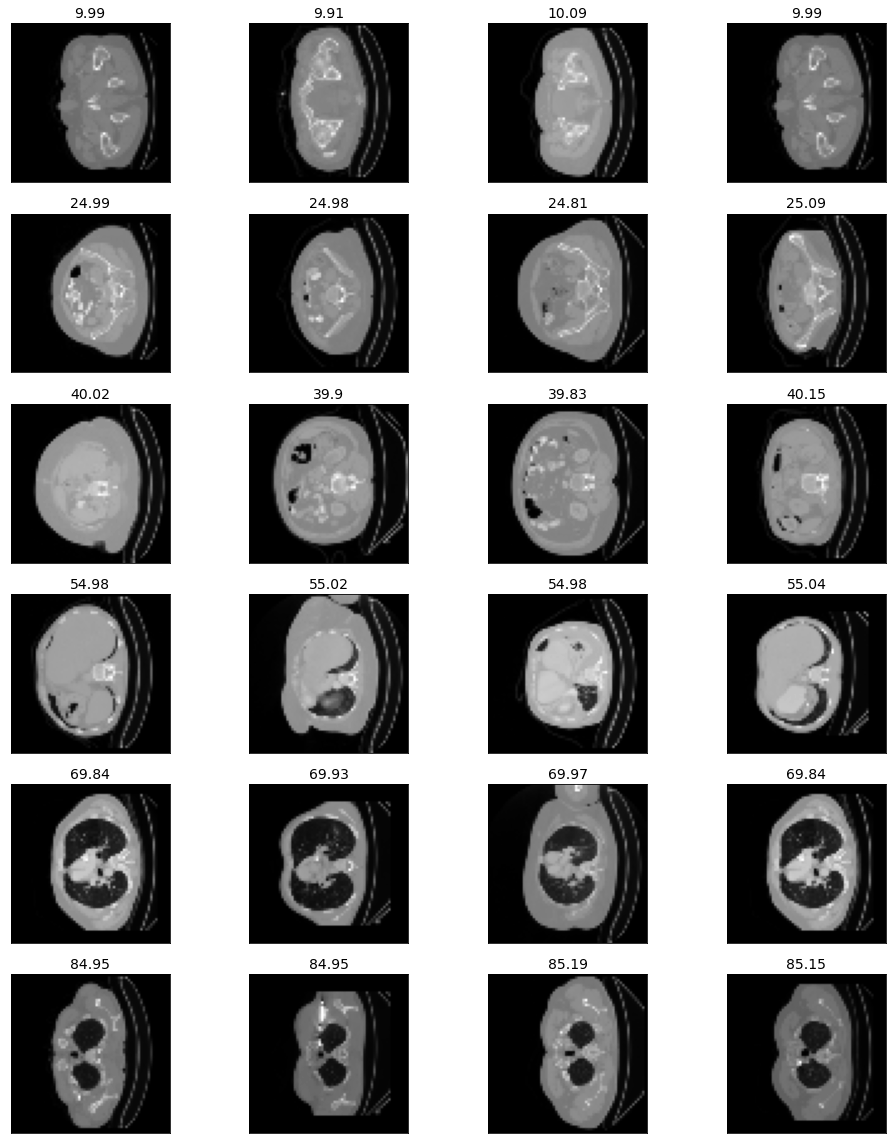

In [40]:
nearby_values=np.arange(10, 100, 15)
print(f"plot slices from test set near scores: {nearby_values}")
modelEval.plot_slices2scores(max_cols=4, nearby_values=nearby_values)

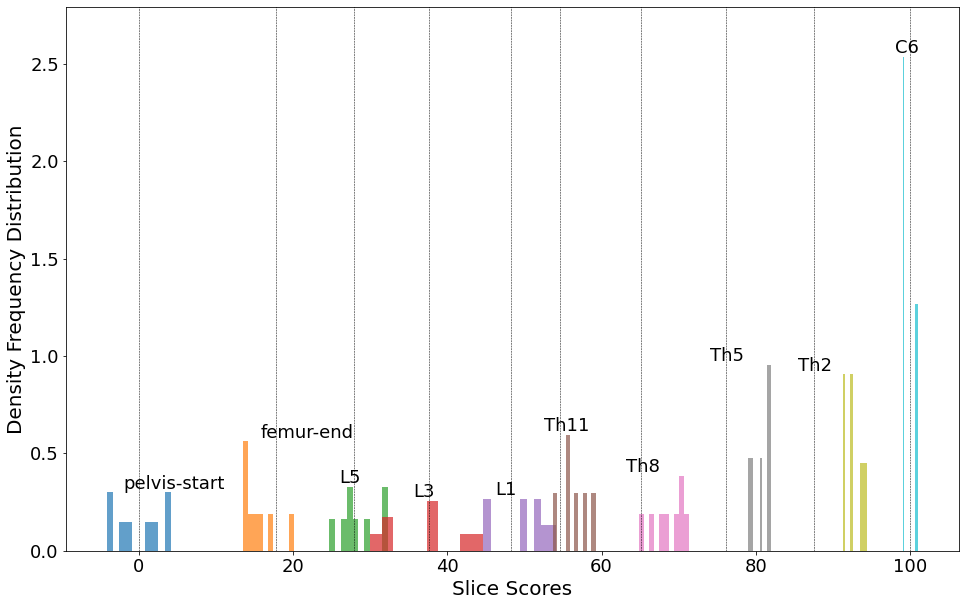

In [23]:
# Plot histograms for each landmark 
modelEval.plot_landmarks()

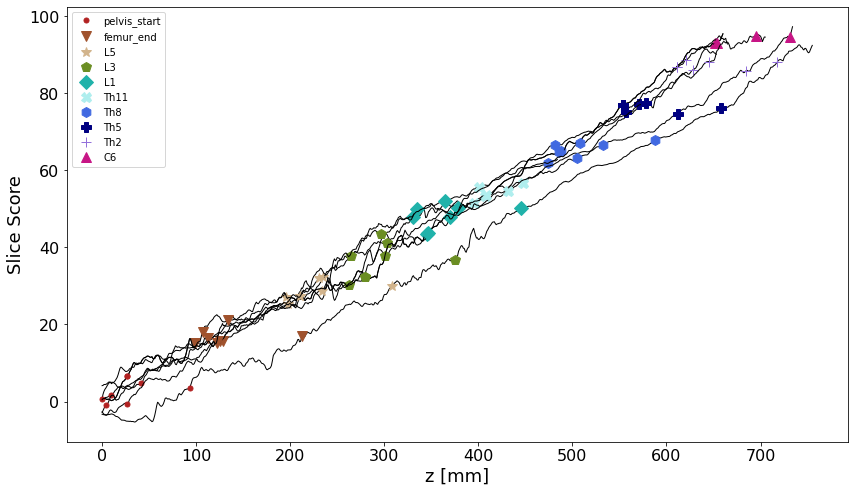

In [55]:
# plot scores of each volume from the test dataset
from scripts.evaluation.validation_volume import ValidationVolume

expected_scores = modelEval.landmark_score_bundle.dict["train"].expected_scores
vol = ValidationVolume(modelEval.inference_model, modelEval.test_dataset, 0, expected_scores)
vol.plot_scores(set_figsize=(12, 8), legend=True)

for i in range(1, len(modelEval.val_dataset)): 
    vol = ValidationVolume(modelEval.inference_model, modelEval.test_dataset, i, expected_scores)
    vol.plot_scores()
